<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework6_problem3(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170M/170M [00:02<00:00, 68.8MB/s]


Training for 300 epochs...

Epoch [1/300]
  Train Loss: 1.6538 | Train Acc: 41.12%
  Val Loss:   1.5172 | Val Acc:   46.15%
  Time: 18.21 sec

Epoch [2/300]
  Train Loss: 1.4294 | Train Acc: 49.47%
  Val Loss:   1.4113 | Val Acc:   50.36%
  Time: 19.89 sec

Epoch [3/300]
  Train Loss: 1.3074 | Train Acc: 53.69%
  Val Loss:   1.3662 | Val Acc:   52.24%
  Time: 17.33 sec

Epoch [4/300]
  Train Loss: 1.2082 | Train Acc: 57.41%
  Val Loss:   1.3380 | Val Acc:   52.73%
  Time: 17.57 sec

Epoch [5/300]
  Train Loss: 1.1242 | Train Acc: 60.30%
  Val Loss:   1.3656 | Val Acc:   52.88%
  Time: 16.27 sec

Epoch [6/300]
  Train Loss: 1.0460 | Train Acc: 62.83%
  Val Loss:   1.3360 | Val Acc:   54.18%
  Time: 17.72 sec

Epoch [7/300]
  Train Loss: 0.9594 | Train Acc: 65.94%
  Val Loss:   1.3822 | Val Acc:   52.98%
  Time: 17.30 sec

Epoch [8/300]
  Train Loss: 0.8870 | Train Acc: 68.21%
  Val Loss:   1.4062 | Val Acc:   54.11%
  Time: 17.37 sec

Epoch [9/300]
  Train Loss: 0.8130 | Train Acc: 71.0

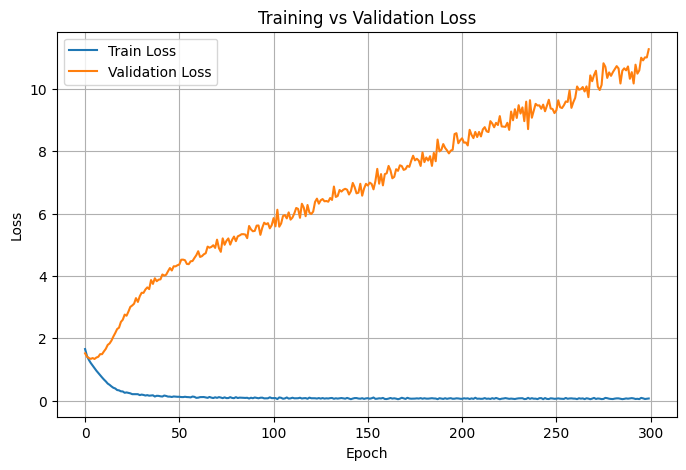

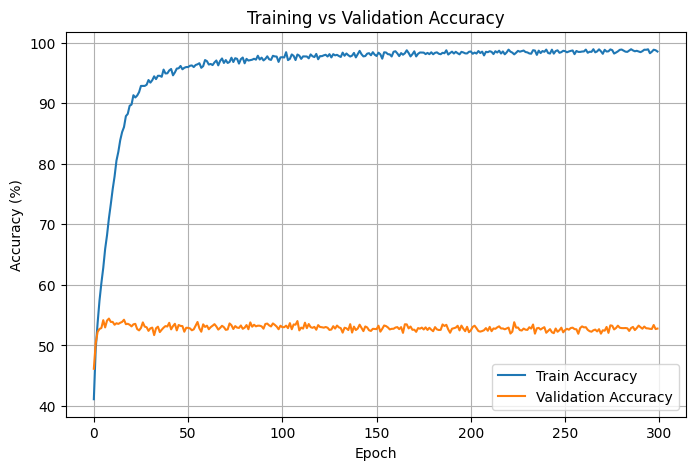

In [2]:
# ================================================================
# CIFAR-10 Fully Connected NN (3 Hidden Layers)
# With TRAIN + VALIDATION Accuracy & Loss Plots
# 300 Epochs
# ================================================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time
import matplotlib.pyplot as plt

# ----------------------------
# 1. Load CIFAR-10 Dataset
# ----------------------------

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

# ----------------------------
# 2. Model Definition
# ----------------------------

class DeepFCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepFCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ----------------------------
# 3. Evaluation Function
# ----------------------------

def get_metrics(model, loader):
    model.eval()
    total_correct = 0
    total_loss = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            _, predicted = outputs.max(1)
            total_correct += predicted.eq(labels).sum().item()
            total_loss += loss.item() * labels.size(0)
            total_samples += labels.size(0)

    avg_loss = total_loss / total_samples
    accuracy = 100 * total_correct / total_samples
    return avg_loss, accuracy

# ----------------------------
# 4. Training (300 Epochs)
# ----------------------------

num_epochs = 300

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

print("Training for 300 epochs...\n")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    start = time.time()

    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * labels.size(0)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    # Compute TRAIN metrics
    train_loss = running_loss / total
    train_acc = 100 * correct / total

    # Compute VALIDATION metrics
    val_loss, val_acc = get_metrics(model, testloader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.2f}%")
    print(f"  Time: {time.time() - start:.2f} sec\n")

# ----------------------------
# 5. Plot Training & Validation Loss
# ----------------------------

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# 6. Plot Training & Validation Accuracy
# ----------------------------

plt.figure(figsize=(8,5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()